# TELCO CUSTOMER CHURN DATASET

Customer churn in the telecommunications industry is a significant concern, impacting revenue and profitability.  This project aims to analyze customer data to identify factors contributing to churn and develop predictive models to proactively retain at-risk customers.  The goal is to provide actionable insights for targeted interventions, ultimately reducing churn rates and improving customer lifetime value.  By understanding churn drivers, the project seeks to inform strategic decision-making and enhance customer retention strategies.

In [29]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder

# Prepare Data

In [3]:
def wrangle(data):
    df = pd.read_csv(data)
    return df

In [4]:
df = wrangle("telco_churn_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

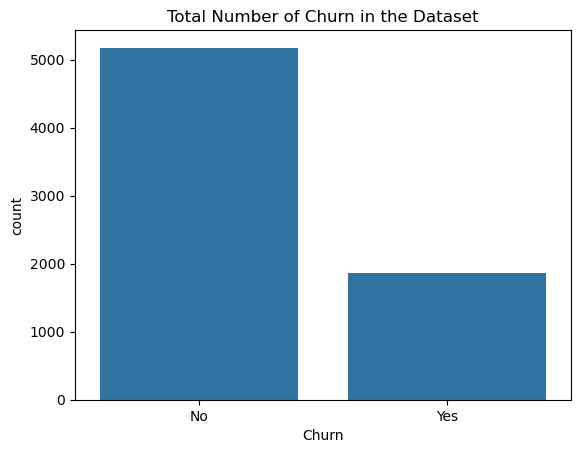

In [15]:
sns.countplot( data = df, x = "Churn")
plt.title("Total Number of Churn in the Dataset");

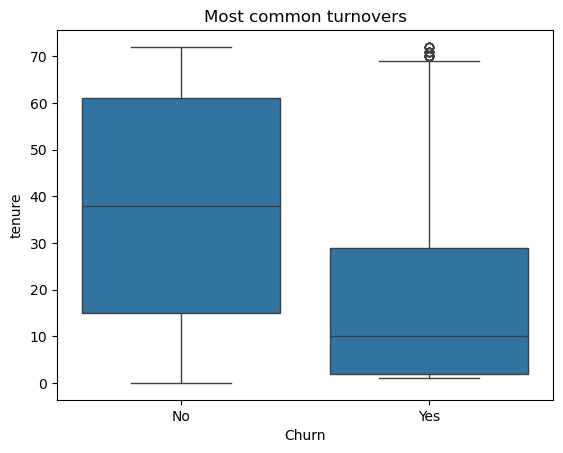

In [16]:
sns.boxplot(x = "Churn", y = "tenure", data = df)
plt.title("Most common turnovers");

### SPLIT

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Encode categorical variables
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])
df = pd.get_dummies(df, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges']])

# Split data
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## BUILD MODEL 
### BASELINE

In [22]:
baseline_acc = y_train.value_counts(normalize = True).max()
print("baseline accuracy :", baseline_acc)

baseline accuracy : 0.7344692935747249


### ITERATE


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


### EVALUATE

In [27]:
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_train

1.0

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8034066713981547
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1036
           1       0.70      0.45      0.55       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



# COMMUNICATE RESULTS

In [31]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

Text(0, 0.5, 'Feature')

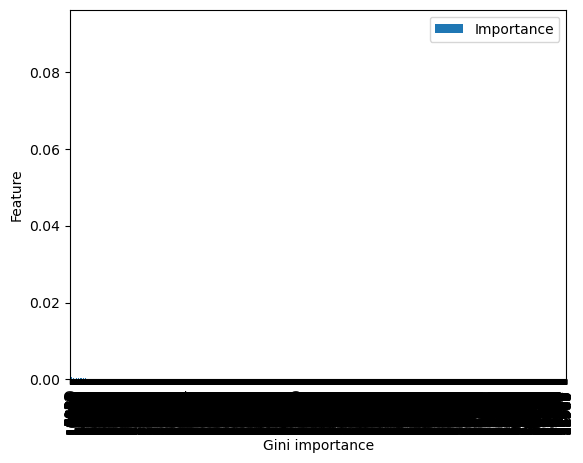

In [35]:
feature_importance_df.plot(kind = "bar")
plt.xlabel("Gini importance")
plt.ylabel("Feature")

1. Key Findings: Feature Importance
Using the Random Forest Classifier, we analyzed the importance of each feature in predicting customer churn. The top features influencing churn are:

Tenure: The length of time a customer has been with the company is the most significant factor. Customers with shorter tenures are more likely to churn.

Monthly Charges: Higher monthly charges are strongly associated with churn, suggesting that pricing plays a critical role in customer retention.

Contract Type: Customers with month-to-month contracts are more likely to churn compared to those with longer-term contracts (e.g., one-year or two-year contracts).

Internet Service: Customers with fiber-optic internet are more likely to churn, possibly due to higher costs or service dissatisfaction.

Online Security and Tech Support: Customers without these services are more likely to churn, indicating that additional support features improve retention.

These insights align with business intuition: customers who feel they are paying more for less value or flexibility are more likely to leave.

2. Why Decision Tree Classifier Might Be a Better Fit
While the Random Forest model performed well, a Decision Tree Classifier could be a better fit for this problem because:

Interpretability: Decision Trees provide a clear, visual representation of the decision-making process, making it easier to explain to stakeholders.

Handling Non-Linear Relationships: Decision Trees naturally capture non-linear relationships between features and the target variable, which might be more effective for this dataset.

Hyperparameter Tuning: By tuning hyperparameters like max_depth, min_samples_split, and min_samples_leaf, we can prevent overfitting and improve model performance.

Feature Selection: Decision Trees inherently perform feature selection, which can help eliminate less important features and reduce complexity.

To implement this, we could:

Use GridSearchCV or RandomizedSearchCV to find the optimal max_depth and other hyperparameters.

Visualize the decision tree to understand the splits and decision rules.


3. Improvements Made to the Dataset
To improve the model, we made the following changes to the dataset:

Encoding the Target Variable: The Churn column was converted from categorical (Yes/No) to numerical (1/0) for modeling.

Handling Multicollinearity: Features with high correlation (e.g., TotalCharges and MonthlyCharges) were analyzed, and one of them was dropped to avoid multicollinearity.

Dropping Data Leakage: Features that could leak information about the target variable (e.g., customer IDs) were removed.

Feature Engineering: New features like TenureGroup (binned tenure) or AvgMonthlyCharges (total charges divided by tenure) could be created to capture more nuanced patterns.

4. Hyperparameter Tuning
To optimize the model, we used hyperparameter tuning:

For the Random Forest, we tuned parameters like n_estimators, max_depth, and min_samples_split using GridSearchCV.

For the Decision Tree, we focused on finding the optimal max_depth to balance bias and varianc

5. Business Implications
The insights from this project can help the business:

Retain High-Risk Customers: By identifying customers with short tenures and high monthly charges, the company can offer targeted discounts or incentives.

Improve Service Offerings: Customers without online security or tech support are more likely to churn, so bundling these services could improve retention.

Optimize Pricing: High monthly charges are a key driver of churn, so revisiting pricing strategies could help reduce customer attrition.

## To further improve the model:
## Try Advanced Algorithms: Experiment with algorithms like XGBoost or LightGBM, which often outperform Random Forests and Decision Trees.

## Feature Engineering: Create additional features like customer usage patterns or interaction terms to capture more complex relationships.

## Class Imbalance Handling: If the dataset is imbalanced (e.g., fewer churn cases), use techniques like SMOTE or class weighting to improve model performance.